<a href="https://colab.research.google.com/github/bhatia-pooja/Sticks-Kebob-Case-Study/blob/main/Customer_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import os

drive.mount("drive")

Mounted at drive


In [2]:
os.chdir('drive/MyDrive/Projects_Pooja')
print(drive)
print(os.getcwd())

<module 'google.colab.drive' from '/usr/local/lib/python3.10/dist-packages/google/colab/drive.py'>
/content/drive/MyDrive/Projects_Pooja


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
cleaned_data = pd.read_csv('customer_survey_df.csv')

# A Sticks Kebob Customer

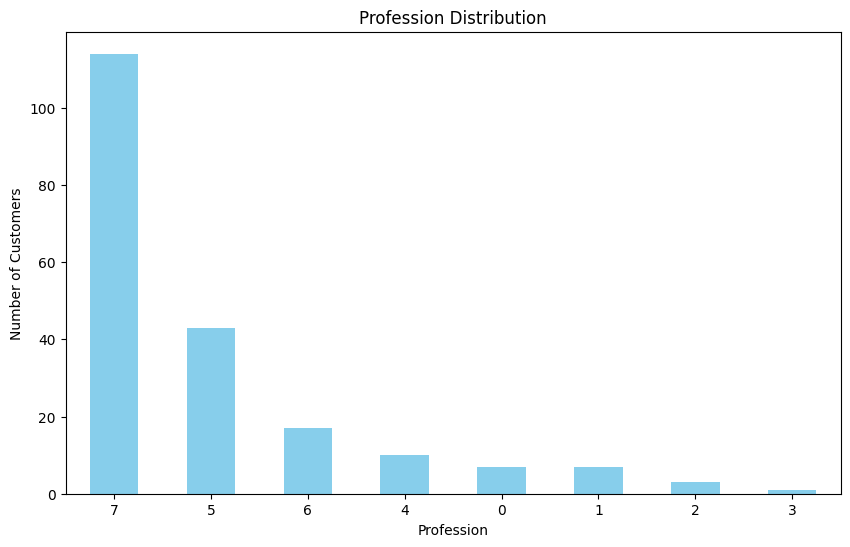

In [5]:
# Profession Distribution
plt.figure(figsize=(10, 6))
profession_distribution = cleaned_data['Profession'].value_counts()
profession_distribution.plot(kind='bar', color='skyblue')
plt.title('Profession Distribution')
plt.xlabel('Profession')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()

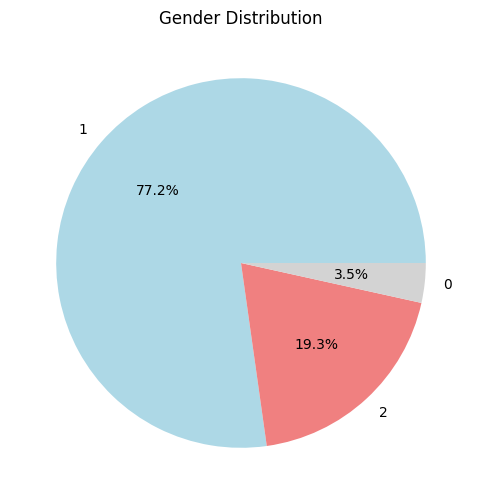

In [6]:
# Gender Distribution
plt.figure(figsize=(10, 6))
gender_distribution = cleaned_data['Gender'].value_counts(normalize=True) * 100  # Convert to percentage
gender_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral', 'lightgray'])
plt.title('Gender Distribution')
plt.ylabel('')
plt.show()

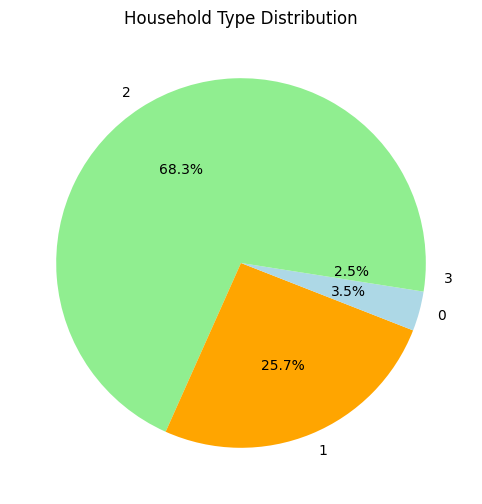

In [7]:
# Household Composition
plt.figure(figsize=(10, 6))
cleaned_data['Household_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'orange', 'lightblue'])
plt.title('Household Type Distribution')
plt.ylabel('')
plt.show()

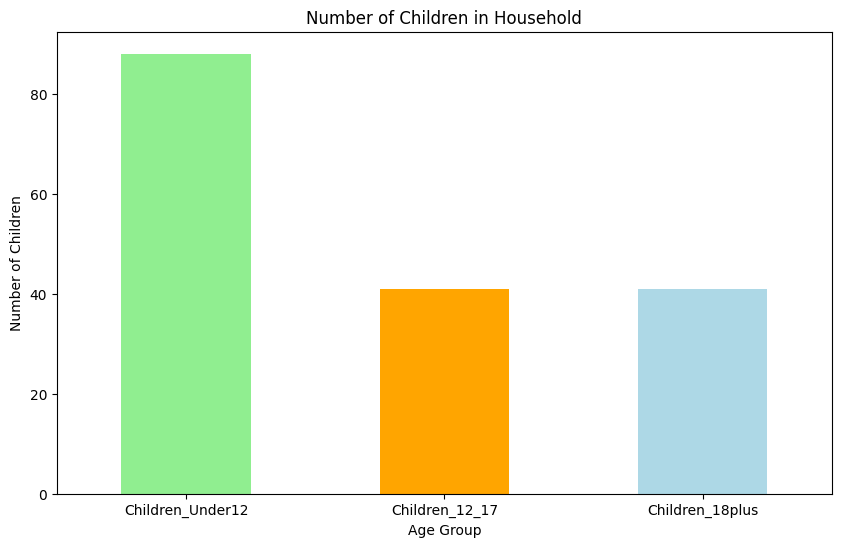

In [8]:
plt.figure(figsize=(10, 6))
# Convert the children columns to numeric
cleaned_data['Children_12_17'] = pd.to_numeric(cleaned_data['Children_12_17'], errors='coerce')
cleaned_data['Children_18plus'] = pd.to_numeric(cleaned_data['Children_18plus'], errors='coerce')
children_sum = cleaned_data[['Children_Under12', 'Children_12_17', 'Children_18plus']].sum()
children_sum.plot(kind='bar', color=['lightgreen', 'orange', 'lightblue'])
plt.title('Number of Children in Household')
plt.xlabel('Age Group')
plt.ylabel('Number of Children')
plt.xticks(rotation=0)
plt.show()

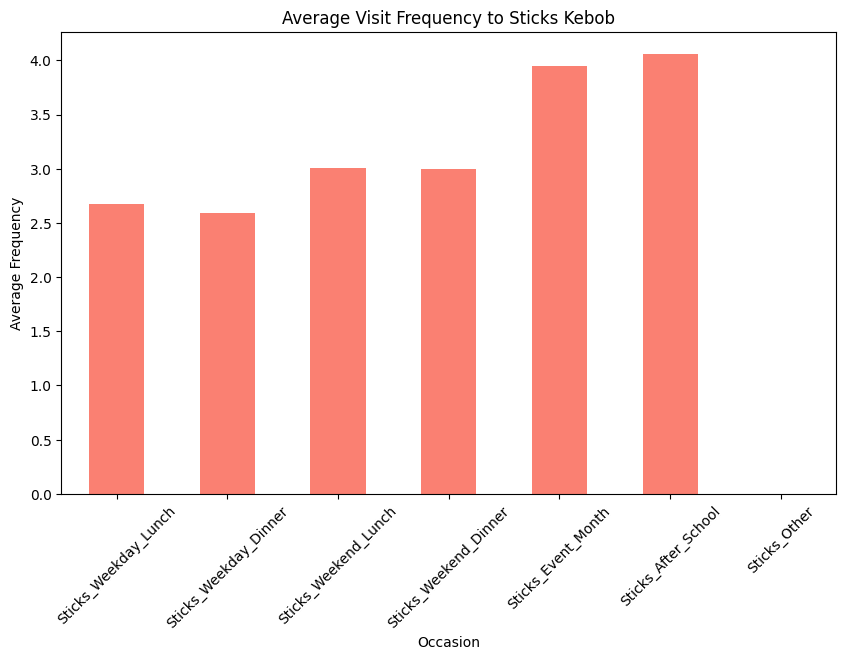

In [9]:
# Visit Frequency
plt.figure(figsize=(10, 6))
visit_columns = ['Sticks_Weekday_Lunch', 'Sticks_Weekday_Dinner', 'Sticks_Weekend_Lunch',
                 'Sticks_Weekend_Dinner', 'Sticks_Event_Month', 'Sticks_After_School', 'Sticks_Other']

# Convert columns to numeric, handling errors
for col in visit_columns:
    cleaned_data[col] = pd.to_numeric(cleaned_data[col], errors='coerce')

visit_frequency = cleaned_data[visit_columns].mean()
visit_frequency.plot(kind='bar', color='salmon')
plt.title('Average Visit Frequency to Sticks Kebob')
plt.xlabel('Occasion')
plt.ylabel('Average Frequency')
plt.xticks(rotation=45)
plt.show()

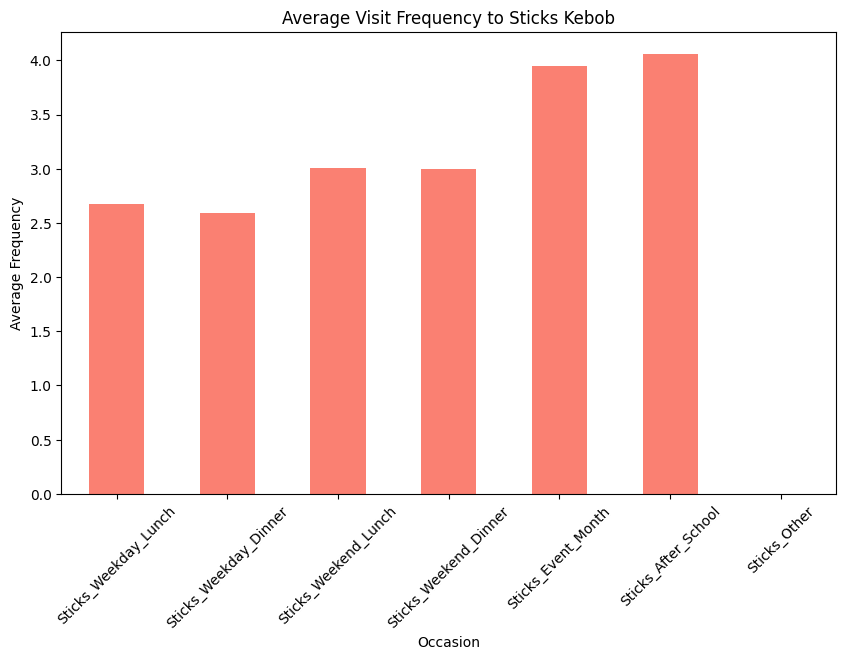

In [10]:
# Visit Frequency
plt.figure(figsize=(10, 6))
visit_columns = ['Sticks_Weekday_Lunch', 'Sticks_Weekday_Dinner', 'Sticks_Weekend_Lunch',
                 'Sticks_Weekend_Dinner', 'Sticks_Event_Month', 'Sticks_After_School', 'Sticks_Other']

# Convert columns to numeric, handling errors
for col in visit_columns:
    cleaned_data[col] = pd.to_numeric(cleaned_data[col], errors='coerce')

visit_frequency = cleaned_data[visit_columns].mean()
visit_frequency.plot(kind='bar', color='salmon')
plt.title('Average Visit Frequency to Sticks Kebob')
plt.xlabel('Occasion')
plt.ylabel('Average Frequency')
plt.xticks(rotation=45)
plt.show()

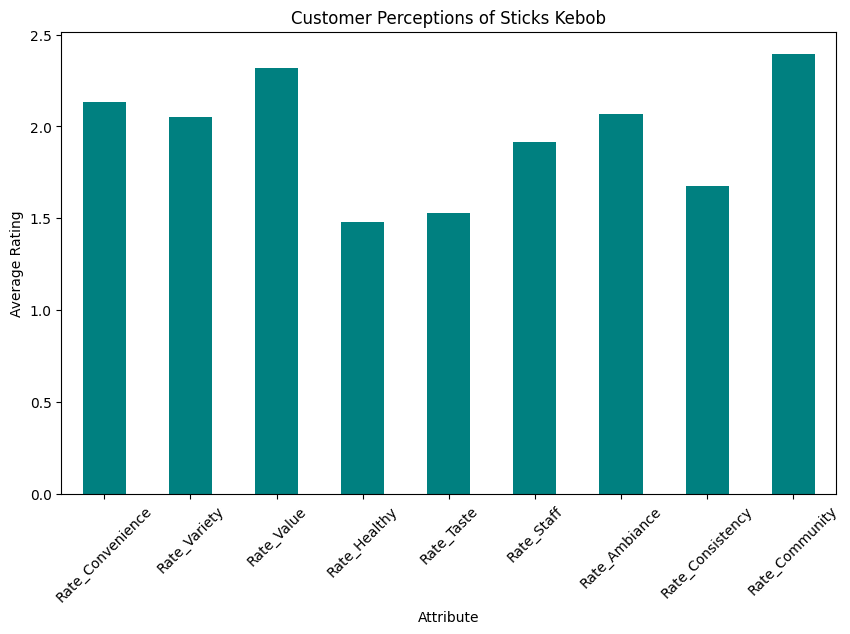

In [11]:
# Perceptions of Sticks
plt.figure(figsize=(10, 6))
perceptions_columns = ['Rate_Convenience', 'Rate_Variety', 'Rate_Value',
                       'Rate_Healthy', 'Rate_Taste', 'Rate_Staff',
                       'Rate_Ambiance', 'Rate_Consistency', 'Rate_Community']
perceptions = cleaned_data[perceptions_columns].mean()
perceptions.plot(kind='bar', color='teal')
plt.title('Customer Perceptions of Sticks Kebob')
plt.xlabel('Attribute')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

# Choose the number of Clusters

In [27]:
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [26]:
# Define the range of clusters to test
cluster_range = range(2, 10)
sse = []
silhouette_coefficients = []

In [34]:
# Select variables for segmentation
segmentation_data = cleaned_data[['Age', 'Income', 'Gender', 'Profession', 'Sticks_Weekday_Lunch',
                                  'Sticks_Weekend_Lunch', 'Importance_Healthy', 'Importance_Taste']]

In [35]:
# Handle any missing data
segmentation_data = segmentation_data.dropna()

# Standardize the data
scaler = StandardScaler()
segmentation_data_scaled = scaler.fit_transform(segmentation_data)

In [39]:
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(segmentation_data_scaled)

    # Calculate SSE
    sse.append(kmeans.inertia_)

    # Calculate Silhouette Coefficient
    silhouette_avg = silhouette_score(segmentation_data_scaled, kmeans.labels_)
    silhouette_coefficients.append(silhouette_avg)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

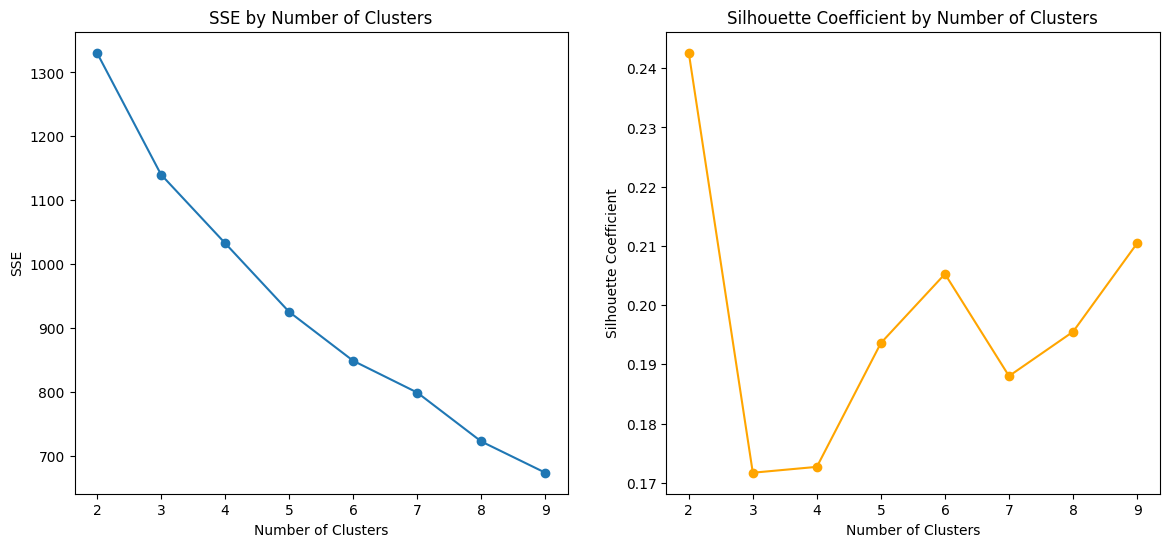

In [40]:
# Plotting SSE and Silhouette Coefficient
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, sse, marker='o')
plt.title('SSE by Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_coefficients, marker='o', color='orange')
plt.title('Silhouette Coefficient by Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')

plt.show()

# Performing K-means Cluster Analysis

In [33]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [36]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # Change n_clusters based on your needs
kmeans.fit(segmentation_data_scaled)

# Add the cluster labels to the original data
cleaned_data['Cluster'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


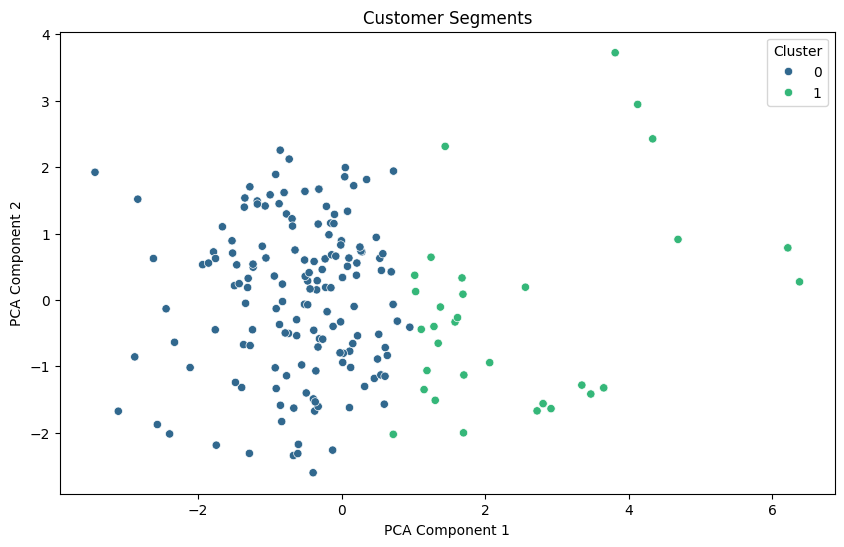

In [37]:
# Visualize the clusters using PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(segmentation_data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_components[:, 0], y=pca_components[:, 1], hue=cleaned_data['Cluster'], palette='viridis')
plt.title('Customer Segments')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [38]:
# Profile the segments
segment_profiles = cleaned_data.groupby('Cluster').mean()
print(segment_profiles)

                obs  Lunch_Home  Lunch_Work  Lunch_Workplace  \
Cluster                                                        
0        378.602410    3.024096    2.548193         1.283133   
1        360.111111    3.222222    2.166667         1.722222   

         Lunch_Restaurant  Skip_Lunch_Snack  Visited_Sticks  \
Cluster                                                       
0                2.921687          1.259036        1.000000   
1                2.555556          1.638889        1.277778   

         Found_Sticks_Friend  Found_Sticks_Media  Found_Sticks_Marketing  ...  \
Cluster                                                                   ...   
0                   0.554217            0.156627                0.072289  ...   
1                   0.444444            0.055556                0.000000  ...   

         Hobby_Museums  Hobby_Kids_Activities  Coupons_Used  Coupons_Valpak  \
Cluster                                                                       
0      